# 3.1.7- Regresión Polinómica

* En este Notebook vamos a ver que es la Regresión Polinómica y a resolver un problema con la librería de Scikit-Learn.
<span></span><br>
    1. [Regresión Polinómica](#M1)
<span></span><br>
    2. [Complejidad del Modelo](#M2)
<span></span><br>
    3. [Ejemplo: Predicción de clientes por hora en una Panadería](#M3)
    <span></span><br>
    3.1. [Tratamiento y Carga de datos](#M31)
    <span></span><br>
    3.2. [Cambio de estructura de datos a numpy y División de datos en entrenamiento y test (20%)](#M32)
    <span></span><br>
    3.3. [Visualización de los datos](#M33)
    <span></span><br>
    3.4. [Creacción de modelos y Evaluación](#M34)
    <span></span><br>
    3.5. [Selección del mejor modelo](#M35)


* Como último paso, mostraremos el código completo para la resolución de este problema como si de un script se tratase.
<span></span><br>
    4. [Regresión Polinómica - Código Completo](#M4)

<hr>
    

## <a name="M1">1. Regresión Polinómica</a>


* Lo que se pretende con la ***regresión lineal es modelar la relación*** que existe ***entre*** una ***variable dependiente 'Y'*** y ***una o más variables independientes 'X'***:

$$y = \beta_0 + X \cdot \beta_1$$


* Un ejemplo lo tenemos en la siguiente imagen:


<img src="../../imgs/3_01_07_01_rlp.png" style="width: 500px;"/>


* La distribución de datos no es siempre lineal y por tanto la regresión lineal resulta ser un modelo muy sencillo para modelar la distribución de los datos, tal y como podemos ver en la siguiente imagen:


<img src="../../imgs/3_01_07_02_rlp.png" style="width: 500px;"/>


* Por tanto tenemos que tener la capacidad de construir modelos más complejos que nos permitan modelar correctamente la distribución de los datos.


* La ***regresión polinómica nos permite*** (al igual que la regresión lineal) ***modelar la relación*** que existe ***entre*** una ***variable dependiente 'Y'*** y ***una o más variables independientes 'X'***; pero añadiendo complejidad al modelo, ***generado un modelo polinómico de grado 'm'***.

    <span style="font-size:20px">$$y = \beta_0 + X \cdot \beta_1 + X_2^{2} \cdot \beta_2 + ... + X_m^{m} \cdot \beta_m$$</span>


* El caso visto en la imagen anterior, podríamos modelarlo con una ecuación de grado 2, quedamos la regresión más ajustada:


<img src="../../imgs/3_01_07_03_rlp.png" style="width: 500px;"/>


* **Según aumentemos la complejidad del modelo, este se ajustará mejor a los datos pero podemos tener problemas de Overfitting***, veamos a continuación como obteniendo modelos más complejos estos se adaptan mejor a los datos:

<table>
  <tr>
    <td><img src="../../imgs/3_01_07_04_rlp.png" style="width: 450px;"/></td>
    <td><img src="../../imgs/3_01_07_05_rlp.png" style="width: 450px;"/></td>
  </tr>
  <tr>
    <td><img src="../../imgs/3_01_07_06_rlp.png" style="width: 450px;"/></td>
    <td><img src="../../imgs/3_01_07_07_rlp.png" style="width: 450px;"/></td>
  </tr>
</table>


<hr>
    

## <a name="M2">2. Complejidad del Modelo</a>


* La Regresión Polinómica nos va a permitir modelar mejor la relación entre la variable dependediente y las variables independientes para el caso en el que la distribución de los datos no sea lineal, ya que nos permitirá construir un modelo más complejo.


* Con la ***Regresión Polinómica corremos el riesgo de generar modelos con un alto grado de complejidad***, lo que significa que se ajustarán bastante bien a los datos de entrenamiento, pero puede que no se ajusten bien a los datos de test, de ahí que haya que buscar un compromiso entre la complejidad del modelo y la evaluación del mismo, para que no se produzca overfitting y para que el modelo generalice bien.


* Veamos a continuación un ejemplo, en el que nos vamos a generar un Dataset con un polinómio de grado 3, al que le vamos a meter algo de ruido:


$$y = X - 2X^{2} + 0.25X^{3} + ruido$$


* Pasamos a generar un conjunto de datos de entrenamiento y otro conjunto de datos de test:


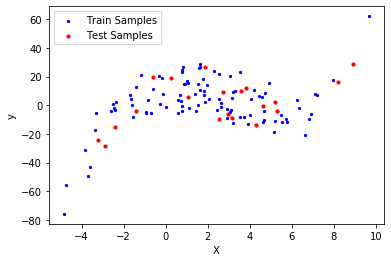

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(num_samples=100, noise=(5,5)):
    x = 2 - 3 * np.random.normal(0, 1, num_samples)
    y = x - 2 * (x ** 2) + 0.25 * (x ** 3) + np.random.normal(noise[0], noise[1], num_samples)
    return x[:,np.newaxis], y

np.random.seed(0)
X_train, y_train = gen_data(num_samples=100, noise=(10,10))
np.random.seed(1)
X_test, y_test = gen_data(num_samples=20, noise=(10,12))
plt.scatter(X_train,y_train,c='b',s=5, label='Train Samples')
plt.scatter(X_test,y_test,c='r',s=10, label='Test Samples')
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.show()

* Podemos observar que la relación entre las variables X e y no siguen una distribución lineal, por lo que tenemos que buscar una relación que no sea lineal.


* A continuación vamos que crear 24 modelos polinómicos de grado 1 a grado 24 para ver:
    1. Relación que obtenemos entre X e y (más o menos compleja).
    2. Error cometido con los datos de entrenamiento y test para cada modelo.
    3. Cómo seleccionar el modelo más óptimo.
    
    
* En el siguiente fragmento de código vamos a:
    1. Transformar los datos a grado 'm'; siendo 'm' el grado del polinómico o complejidad del modelo.
    2. Ajustar el modelo de complejidad 'm'.
    3. Obtener el error (Error Cuadrático Medio -MSE) para los datos de entrenamiento y test.
    4. Resultados del modelo para su representación.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

MAX_DEGREE = 24

models = list()
for degree in range(1, MAX_DEGREE+1):
    
    # Complejidad del modelo
    model = dict()
    model['degree'] = degree
    
    # Transformo los datos
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly_train = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.fit_transform(X_test)
    
    # Creo el modelo y lo ajusto
    reg = LinearRegression()
    reg.fit(x_poly_train, y_train)
    model['model'] = reg
    models.append(model)
    
    # Calculo el MSE para entrenamiento y test
    y_train_pred = reg.predict(x_poly_train)
    y_test_pred = reg.predict(x_poly_test)
    model['mse_train'] = mean_squared_error(y_train, y_train_pred)
    model['mse_test'] = mean_squared_error(y_test, y_test_pred)
    
    # Calculo los resultados del modelo
    X_plot, y_plot = zip(*sorted(zip(X_train, y_train_pred)))
    model['plot_X'] = X_plot
    model['plot_y'] = y_plot

* A continuación vamos a representar gráficamente el Error Cuadrático Médio obtenido en función de la complejidad del modelo.


* Con el fin de hacer más legible el gráfico, solo mostraremos los errores para los modelos de complejidad del 1 al 12, ya que el error de test cometido a partir del modelo de complejidad 13 es tan alto que no nos permitiría ver la evolución del error:

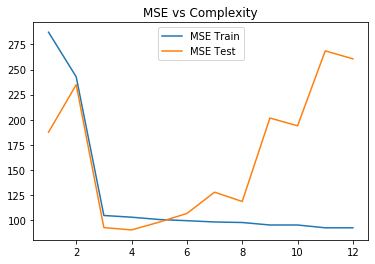

In [3]:
MAX_COMPLEXITY = 12

degree = [model['degree'] for model in models]
mse_train = [model['mse_train'] for model in models]
mse_test = [model['mse_test'] for model in models]


plt.title('MSE vs Complexity')
plt.plot(degree[:MAX_COMPLEXITY], mse_train[:MAX_COMPLEXITY], label='MSE Train')
plt.plot(degree[:MAX_COMPLEXITY], mse_test[:MAX_COMPLEXITY], label='MSE Test')
plt.legend(loc='upper center')
plt.show()

### Conclusiones


* Podemos observar que los modelos de complejidad (o grado) 3 y 4 tienen unos errores de entrenamiento y test similares, por lo que hay que concluir que deberíamos de quedarnos con el modelo de grado 3 o 4, ya que estos generalizan bastante bien y no producen overfitting.


* En el siguiente gráfico podemos ver como según aumentamos la complejidad del modelo, obtenemos menor error de entrenamiento hasta un modelo de complejidad 16, donde podemos observar que se produce overfitting.


* A partir de un modelo de complejidad mayor a 16, podemos observar como su error aumenta.

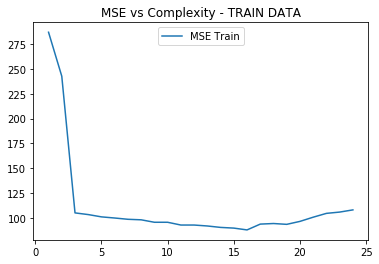

In [4]:
plt.title('MSE vs Complexity - TRAIN DATA')
plt.plot(degree, mse_train, label='MSE Train')
plt.legend(loc='upper center')
plt.show()

### Visualización de los modelos en función de su complejidad


* A continuación vamos a mostrar como quedarían los modelos generados en función de su complejidad y como se ajustan a los datos de entrenamiento:

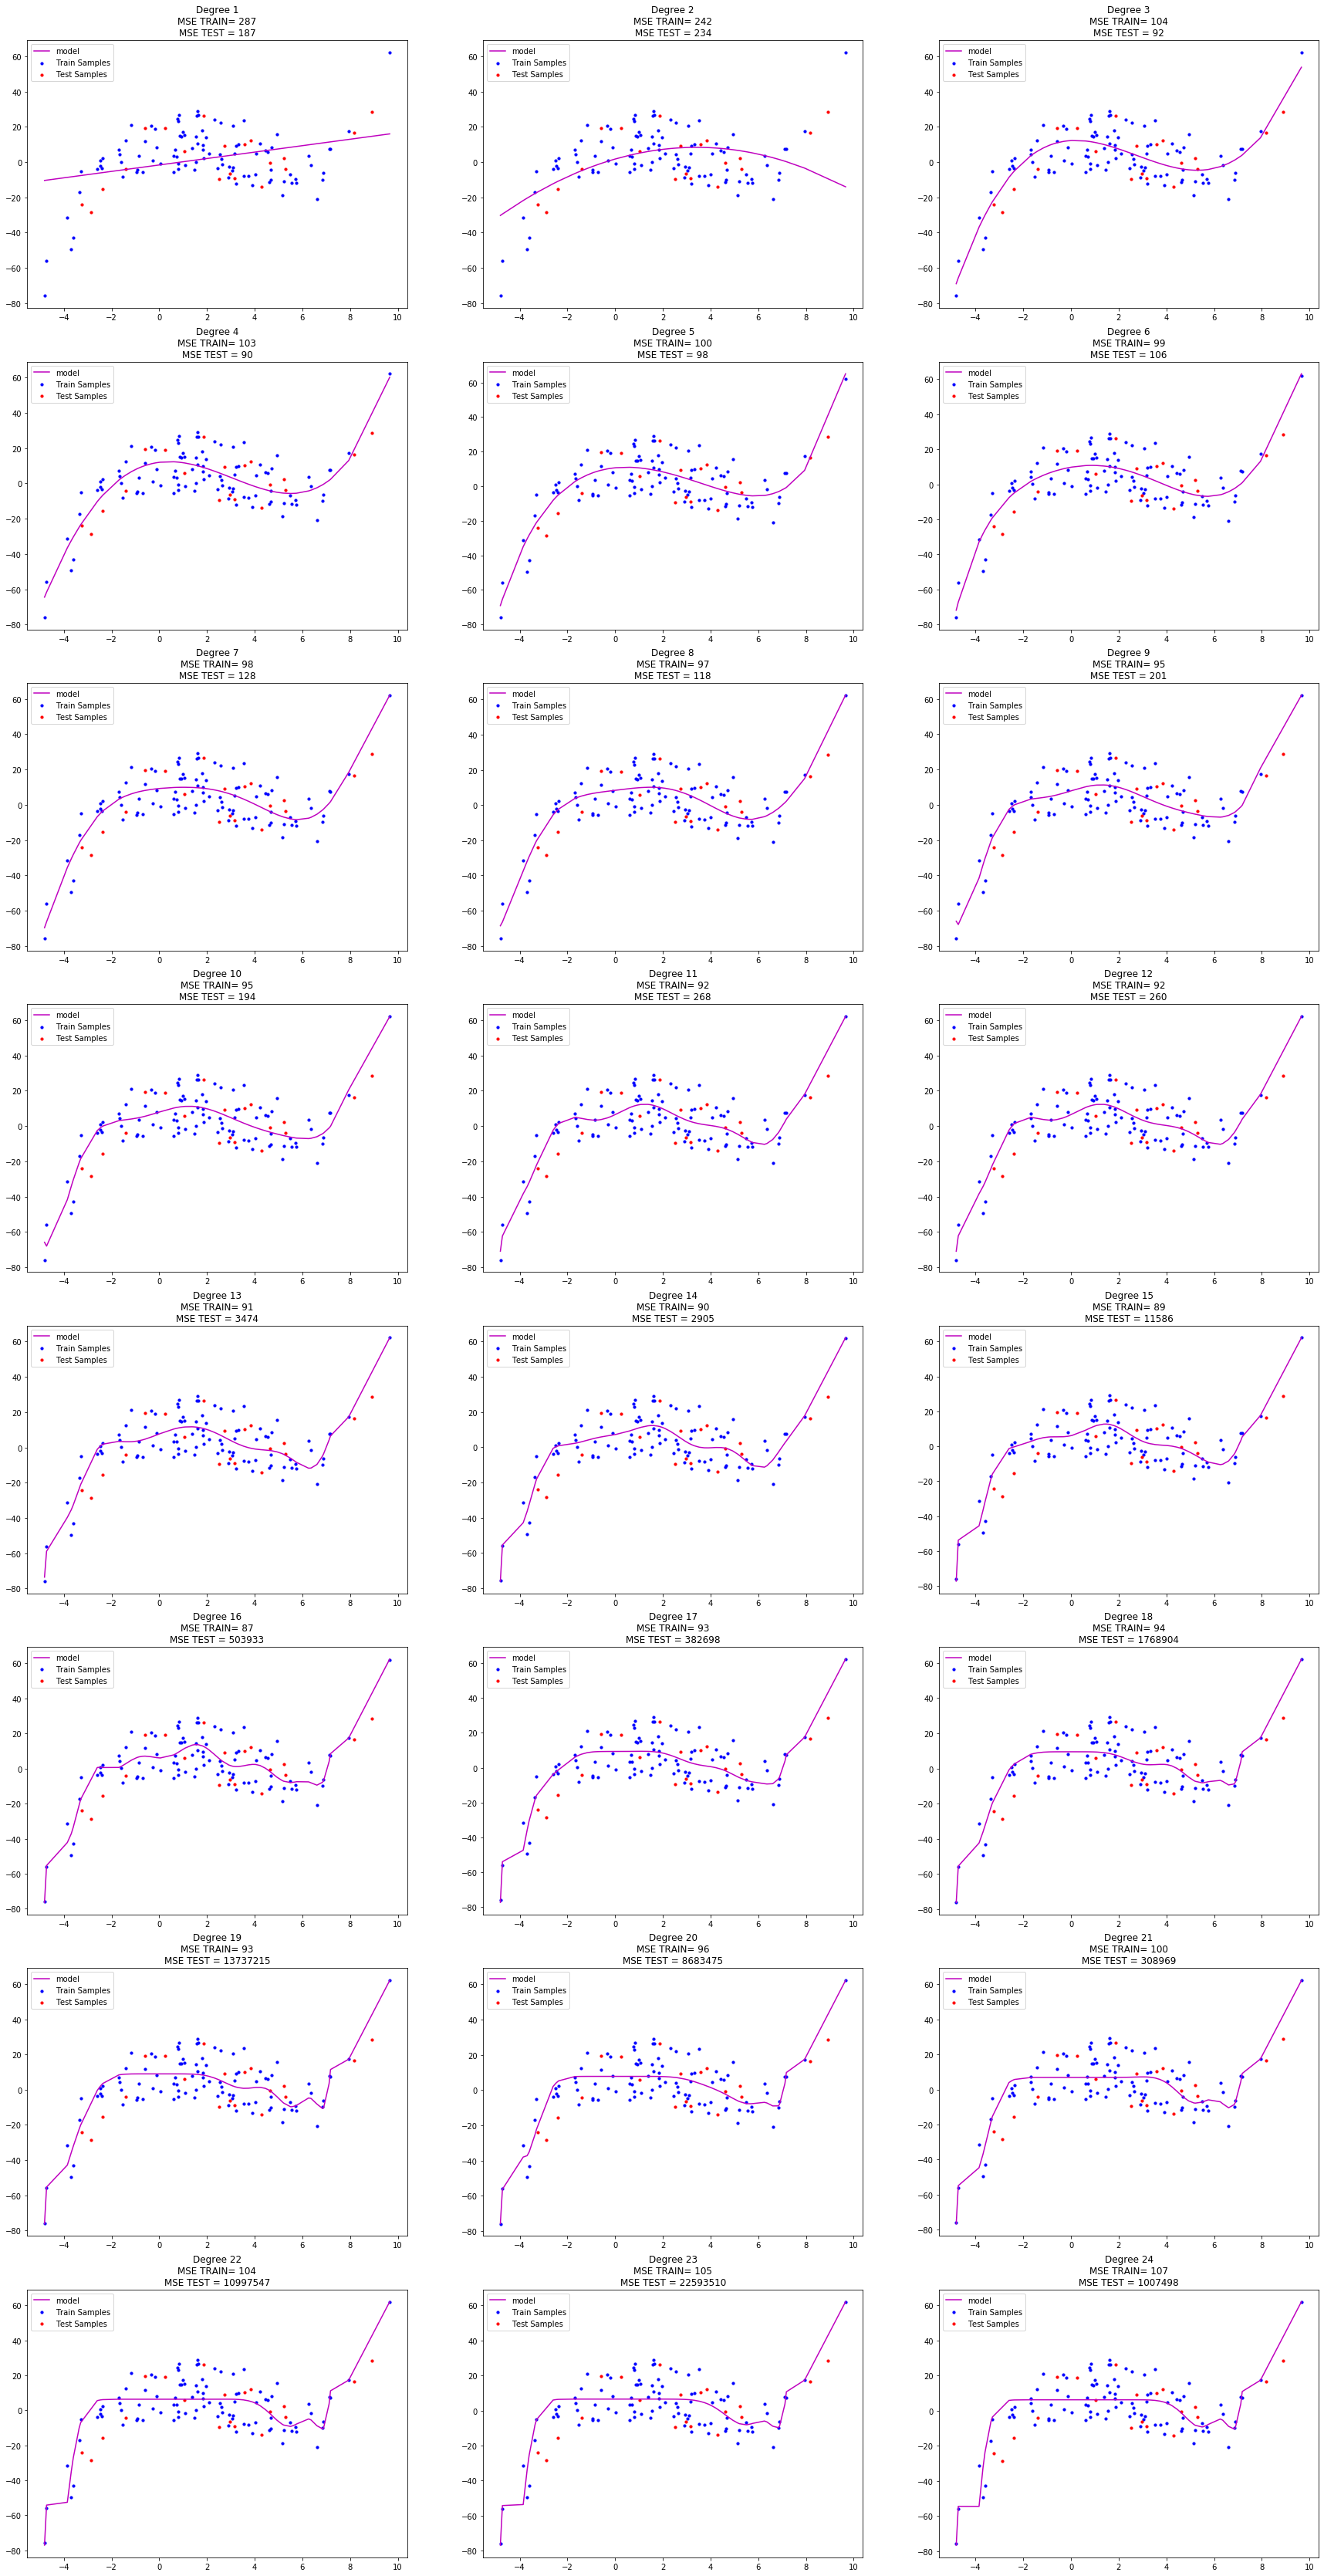

In [5]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(30,60))
for i, ax in enumerate(axes.flatten()):
    ax.title.set_text('Degree {}\nMSE TRAIN= {}\nMSE TEST = {}'
                      .format(models[i]['degree'],
                              int(models[i]['mse_train']),
                              int(models[i]['mse_test'])))
    ax.scatter(X_train,y_train,c='b',s=10, label='Train Samples')
    ax.scatter(X_test,y_test,c='r',s=10, label='Test Samples')
    ax.plot(models[i]['plot_X'], models[i]['plot_y'], color='m', label='model')
    ax.legend(loc='upper left')

plt.show()

<hr>
    

## <a name="M3">3. Ejemplo: Predicción de clientes por hora en una Panadería</a>


* A continuación vamos a ***resolver un problema de regresión polinómica, en el que tenemos que predecir el número de clientes que iran a la panadería en función de la hora del día***.


* Para realizar este ejemplo disponemos del Dataset "BreadBasket_DMS.csv" para cada venta de la panadería los siguientes datos:

    - Date: Día de compra
    - Time: Hora de la compra
    - Transaction: Identificador de la compra
    - Item: Producto comprado

* Para resolver el problema de regresión vamos a utilizar la clase **"LinearRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


* Para crear las variables "polinómicas" del Dataset, utilizaremos la clase **"PolynomialFeatures()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


* Para resolver este problema seguiremos los siguiente pasos:
    <span></span><br>
    1. [Tratamiento y Carga de datos](#M31)
    <span></span><br>
    2. [Cambio de estructura de datos a numpy y División de datos en entrenamiento y test (20%)](#M32)
    <span></span><br>
    3. [Visualización de los datos](#M33)
    <span></span><br>
    4. [Creacción de modelos y Evaluación](#M34)
    <span></span><br>
    5. [Selección del mejor modelo](#M35)

<hr>
    

### <a name="M31">3.1. Tratamiento y Carga de datos</a>



* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/BreadBasket_DMS.csv"
    
    
* Una vez cargado el Dataset, vamos a crear una nueva columna con la hora de la venta.


* Agregamos los datos por fecha y hora y contamos el número de Transacciones.


In [6]:
# Cargo el Dataset
df = pd.read_csv("../../data/BreadBasket_DMS.csv")

# Creo la columna hora
df['hour'] = pd.to_datetime(df['Time']).dt.hour

# Agregamos los datos
df_agg = df.groupby(['Date', 'hour'])['Transaction'].agg(['count']).reset_index()

# Imprimo una muestra
df_agg.sample(5)

,Date,hour,count
75,2016-11-05,18,2
698,2017-01-14,15,9
839,2017-01-30,8,2
1486,2017-04-08,12,16
1006,2017-02-16,11,11


<hr>
    
### <a name="M32">3.2. Cambio de estructura de datos a numpy y División de datos en entrenamiento y test (20%)</a> 


In [7]:
from sklearn.model_selection import train_test_split

# Cambio de estructura de datos a numpy
X = df_agg[['hour']].values
y = df_agg['count'].values

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print("Número de elementos para el entrenamiento: {}".format(len(X_train)))
print("Número de elementos de Test: {}".format(len(X_test)))

Número de elementos para el entrenamiento: 1200
Número de elementos de Test: 301


<hr>
    
### <a name="M33">3.3. Visualización de los datos</a>


* A continuación vamos a mostar el número de compras por dias y horas, para hacernos una idea de la relación que hay entre la hora del día y el número de compras:

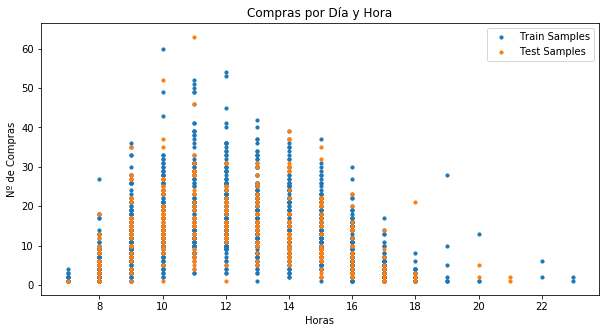

In [8]:
# Creamos la gráfica y visualizamos la relación entre minutos y calorías.
fig, ax =  plt.subplots(figsize=(10, 5))
ax.scatter(X_train,y_train, s=10, label='Train Samples')
ax.scatter(X_test,y_test, s=10, label='Test Samples')
ax.set_title("Compras por Día y Hora")
ax.set_xlabel("Horas")
ax.set_ylabel("Nº de Compras")
plt.legend(loc='upper right')
plt.show()

* Para hacernos una mejor idea de la distribución que siguien las compras en la panadería por hora, vamos a representar el total de compras por hora:

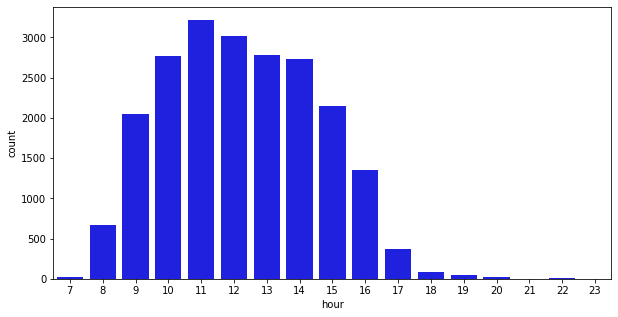

In [9]:
import seaborn as sns

# Agregamos los datos
df_plot = df.groupby(['hour'])['Transaction'].agg(['count']).reset_index()

# Pintamos los datos
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="hour", y="count", data=df_plot, color='b')

<hr>
    
### <a name="M34">3.4. Creacción de modelos y Evaluación</a>


* Tras visualizar los datos, podemos observar que la relación entre la hora y el número de compras no es lineal, asi que hay que construir un modelo polinómico.


* Para ello vamos a generar 15 modelos de grado (o complejidad) del 1 al 15 y vamos a ver sus errores en entrenamiento y test:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

MAX_DEGREE = 15

models = list()
for degree in range(1, MAX_DEGREE+1):
    
    # Complejidad del modelo
    model = dict()
    model['degree'] = degree
    
    # Transformo los datos
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly_train = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.fit_transform(X_test)
    
    # Creo el modelo y lo ajusto
    reg = LinearRegression()
    reg.fit(x_poly_train, y_train)
    model['model'] = reg
    models.append(model)
    
    # Calculo el MSE para entrenamiento y test
    y_train_pred = reg.predict(x_poly_train)
    y_test_pred = reg.predict(x_poly_test)
    model['mse_train'] = mean_squared_error(y_train, y_train_pred)
    model['mse_test'] = mean_squared_error(y_test, y_test_pred)
    
    # Calculo los resultados del modelo
    X_plot, y_plot = zip(*sorted(zip(X_train, y_train_pred)))
    model['plot_X'] = X_plot
    model['plot_y'] = y_plot

* A continuación mostramos la evolución del error (MSE) con los datos de entrenamiento y test en función del grado (o complejidad) del modelo.

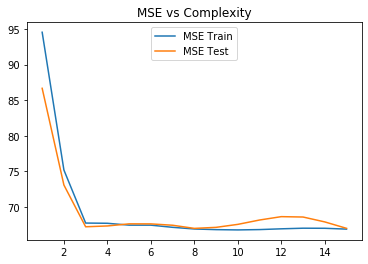

In [11]:
degree = [model['degree'] for model in models]
mse_train = [model['mse_train'] for model in models]
mse_test = [model['mse_test'] for model in models]

plt.title('MSE vs Complexity')
plt.plot(degree, mse_train, label='MSE Train')
plt.plot(degree, mse_test, label='MSE Test')
plt.legend(loc='upper center')
plt.show()

* A continuación se muestra como se ajustaría el modelo a los datos en función de la complejidad del modelo, mostrando el error (MSE) de los datos de entrenamiento y test obtenidos.

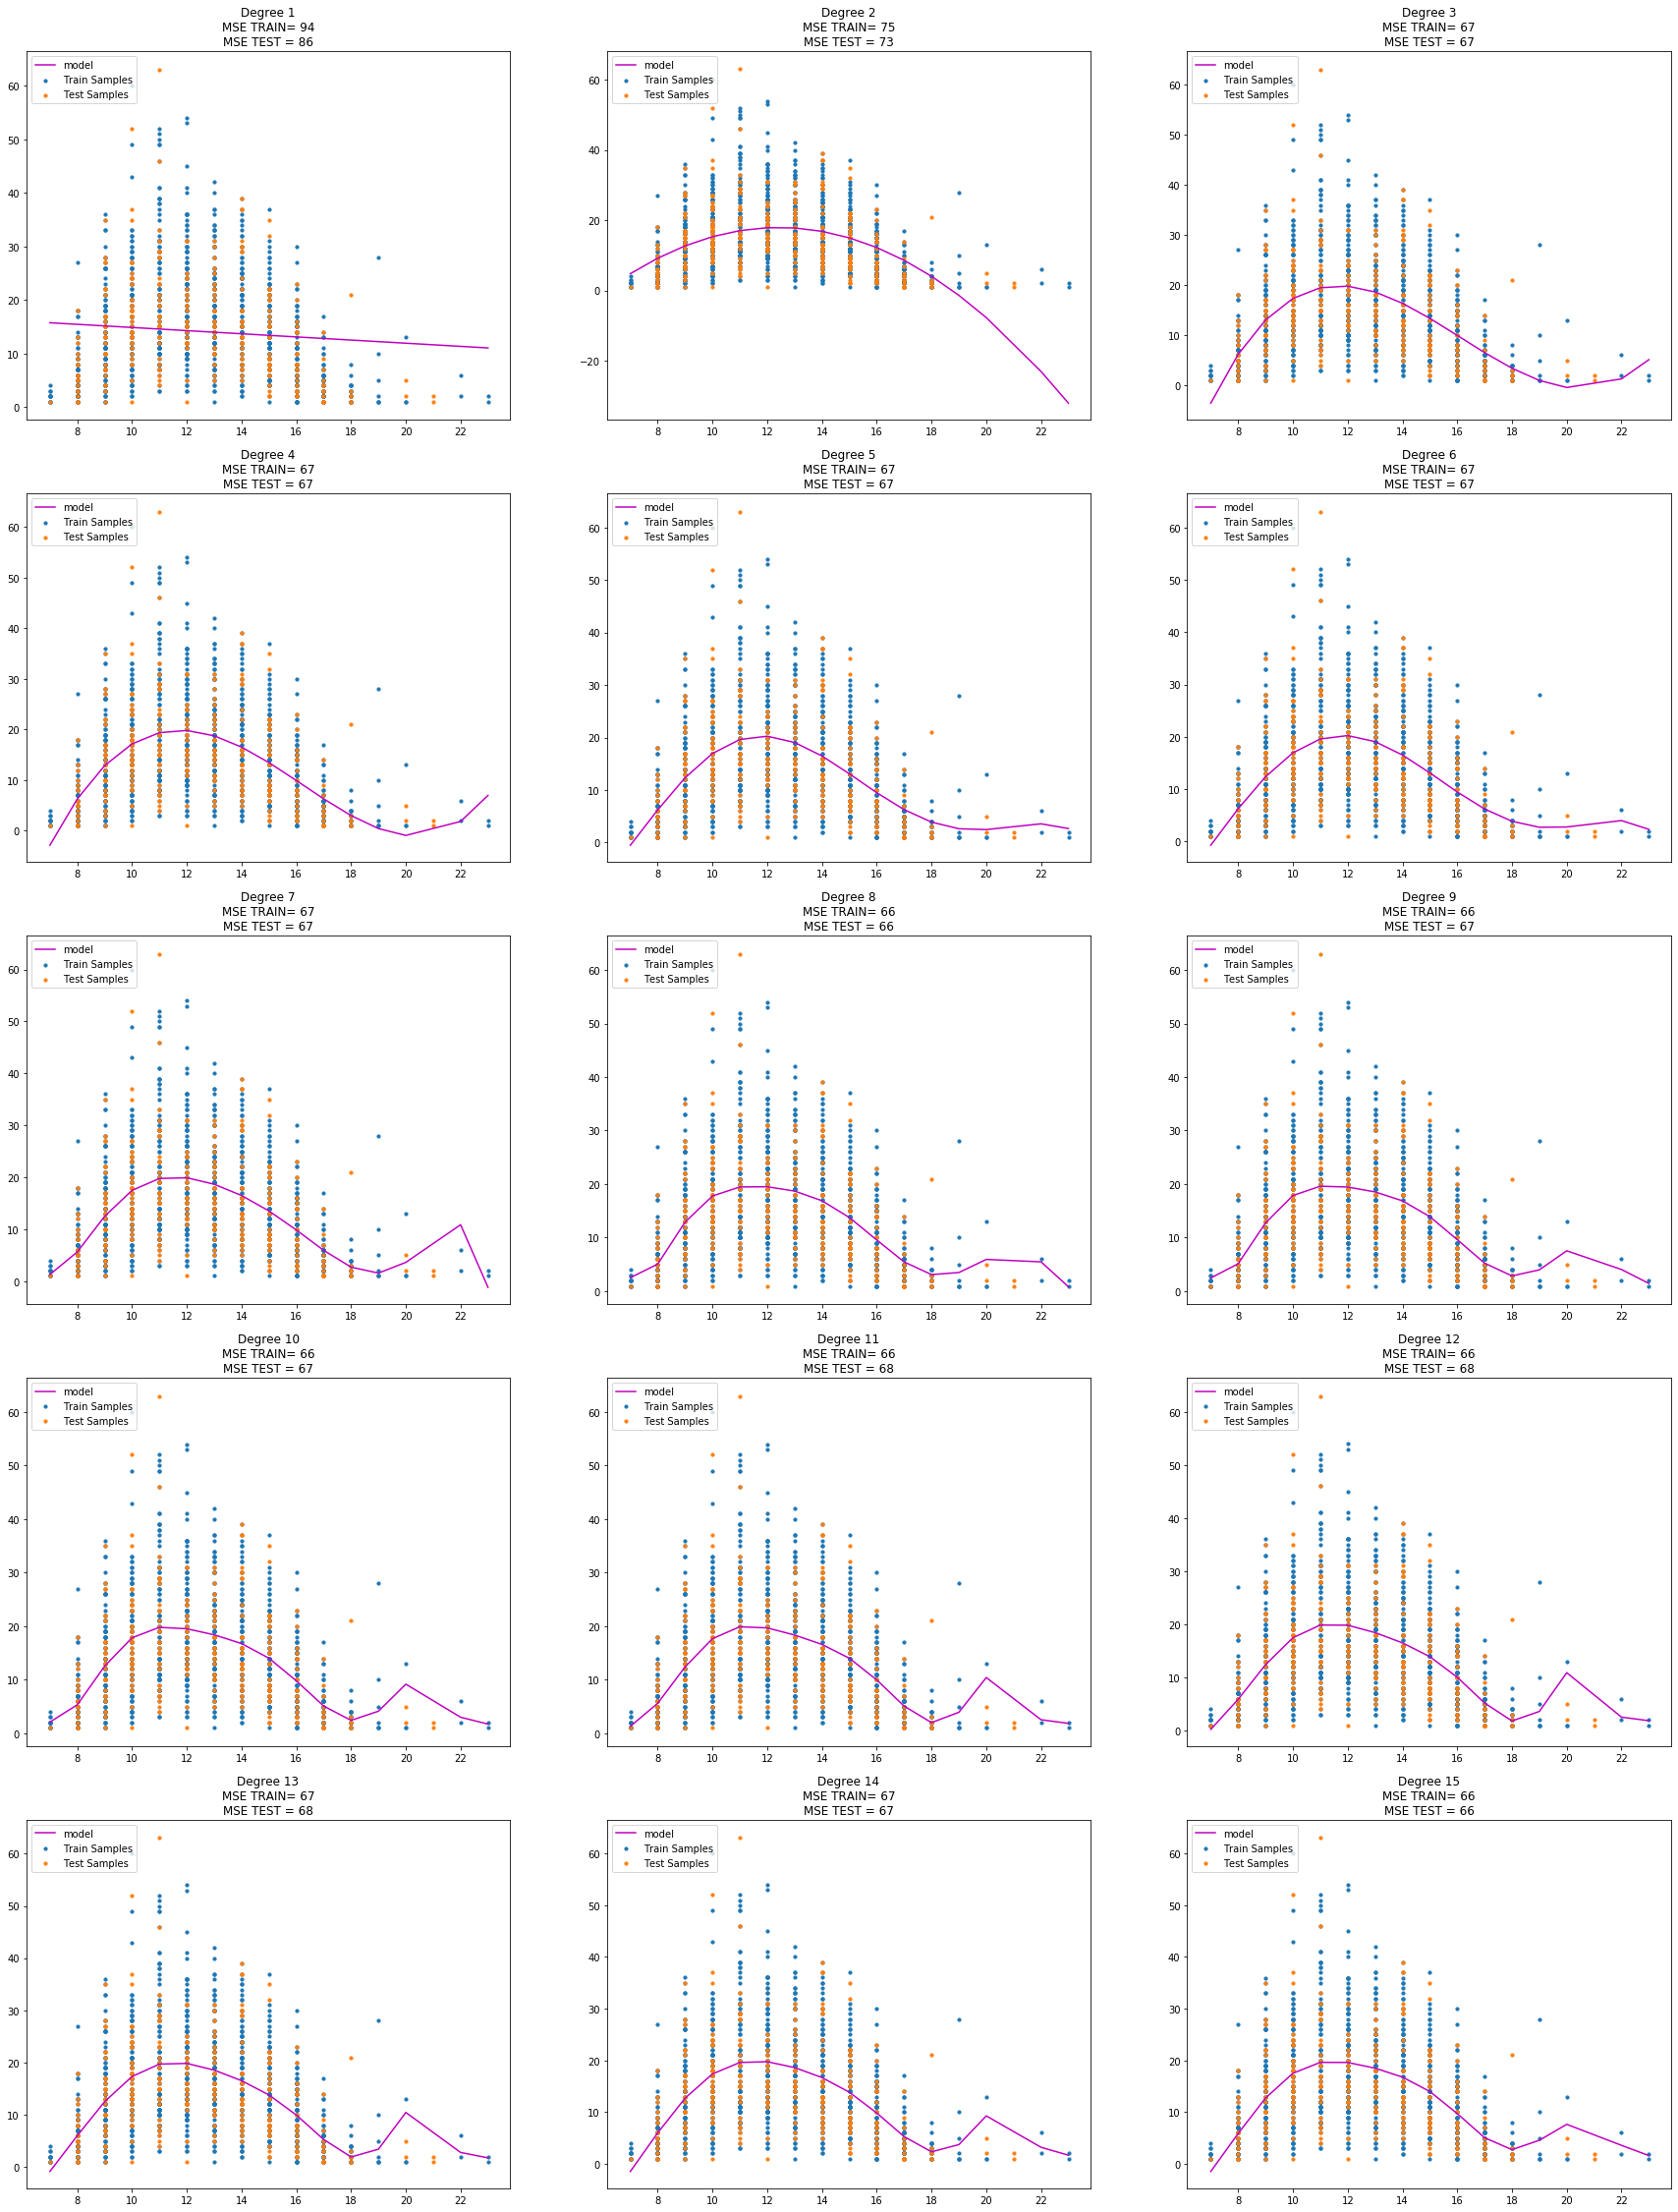

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30,40))
for i, ax in enumerate(axes.flatten()):
    ax.title.set_text('Degree {}\nMSE TRAIN= {}\nMSE TEST = {}'
                      .format(models[i]['degree'],
                              int(models[i]['mse_train']),
                              int(models[i]['mse_test'])))
    ax.scatter(X_train,y_train, s=10, label='Train Samples')
    ax.scatter(X_test,y_test, s=10, label='Test Samples')
    ax.plot(models[i]['plot_X'], models[i]['plot_y'], color='m', label='model')
    ax.legend(loc='upper left')

plt.show()

<hr>
    
### <a name="M35">3.5. Selección del mejor modelo</a>


* Con los resultados obtenidos podemos concluir que debemos de ***seleccionar el modelo generado por un polinomio de grado 3*** ya que es el ***modelo de menor complejidad que mejores resultados ofrece tanto para los datos de entrenamiento y test***.


* No seleccionamos los modelos con los polinomios de grados 1 y 2 ya que los resultados del MSE son considerablemente peores que los obtenidos con el modelo de grado 3.


* Tampoco vamos a seleccionar los modelos con los polinomios de grado superiores a 3, ya que aunque den resultados de MSE similares a los del modelo con polinomio de grado 3, son modelos más complejos que pueden tender a no generalizar con nuevos datos.

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">